In [1]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

# train-images-idx3-ubyte.gz: training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

def load_idx(filepath):
    with gzip.open(filepath, 'rb') as fin:
        idx_data = fin.read()
        idx = 0
        unsigned = idx_data[idx + 2] == 8
        dim = idx_data[idx + 3]
        idx += 4

        dim_shape = []
        for i in range(dim):
            dim_shape.append(int.from_bytes(idx_data[idx:idx+4], 'big', signed=False))
            idx += 4

        if unsigned:
            return np.frombuffer(idx_data[idx:], np.uint8).reshape(dim_shape)
        return None

def select_images():
    if (not os.path.exists('data')):
        os.makedirs('data')
    if (not os.path.exists('data/train-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'data/train-images-idx3-ubyte.gz')
    if (not os.path.exists('data/train-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'data/train-labels-idx1-ubyte.gz')
    if (not os.path.exists('data/t10k-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 'data/t10k-images-idx3-ubyte.gz')
    if (not os.path.exists('data/t10k-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 'data/t10k-labels-idx1-ubyte.gz')
    train_images_data = load_idx('data/train-images-idx3-ubyte.gz')
    train_labels_data = load_idx('data/train-labels-idx1-ubyte.gz')
    test_images_data = load_idx('data/t10k-images-idx3-ubyte.gz')
    test_labels_data = load_idx('data/t10k-labels-idx1-ubyte.gz')

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(train_labels_data == n)[0][:]
        images_list.append(train_images_data[idx])
        labels_list.extend(train_labels_data[idx])
    train_images = np.vstack(images_list)
    train_labels = np.vstack(labels_list).reshape(-1)
    train_labels = np.eye(10)[train_labels]

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(test_labels_data == n)[0][:]
        images_list.append(test_images_data[idx])
        labels_list.extend(test_labels_data[idx])
    test_images = np.vstack(images_list)
    test_labels = np.vstack(labels_list).reshape(-1)
    test_labels = np.eye(10)[test_labels]

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = select_images()

X_train = (train_images.reshape(train_images.shape[0], -1) / 255.0).astype(np.float64)
Y_train = train_labels.astype(np.float32)
X_test = (test_images.reshape(test_images.shape[0], -1) / 255.0).astype(np.float64)
Y_test = test_labels.astype(np.float64)

In [ ]:
import sys
sys.path.append('build')
from compugraph import mlp1
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp1(X_train, Y_train, X_test, Y_test, 10)
results

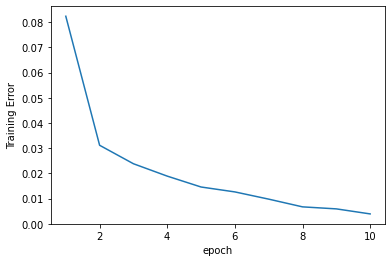

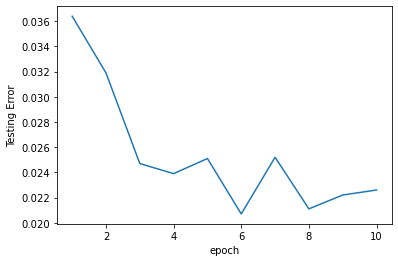

In [13]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()

In [14]:
import sys
sys.path.append('build')
from compugraph import mlp2
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp2(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


[{'test_accuracy': 0.9478,
  'test_loss': 1658.1361909364298,
  'train_accuracy': 0.8539666666666667,
  'train_loss': 25825.343498838076},
 {'test_accuracy': 0.9643,
  'test_loss': 1193.5811121480906,
  'train_accuracy': 0.96375,
  'train_loss': 7191.328081233791},
 {'test_accuracy': 0.9681,
  'test_loss': 1031.9857761352703,
  'train_accuracy': 0.9732166666666666,
  'train_loss': 5186.474762099092},
 {'test_accuracy': 0.9716,
  'test_loss': 951.660436864404,
  'train_accuracy': 0.97945,
  'train_loss': 3995.003880106413},
 {'test_accuracy': 0.9743,
  'test_loss': 879.0609958236713,
  'train_accuracy': 0.9832166666666666,
  'train_loss': 3248.7937265751884},
 {'test_accuracy': 0.9752,
  'test_loss': 872.7154150721499,
  'train_accuracy': 0.9854666666666667,
  'train_loss': 2677.9123213581643},
 {'test_accuracy': 0.9751,
  'test_loss': 881.1733360155546,
  'train_accuracy': 0.9865666666666667,
  'train_loss': 2499.438766307814},
 {'test_accuracy': 0.9765,
  'test_loss': 928.881116566964

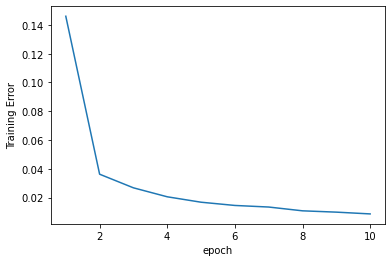

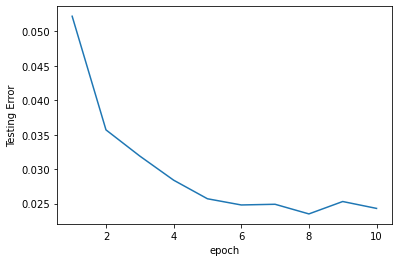

In [15]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()